## PRAICP-1000-IndiSignLang

In [1]:
# General Purpose Libraries
import os
import numpy as np
import pandas as pd
import zipfile

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras

# Computer Vision
import cv2

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# execute this only once... if you run again, skip this part
# Unzip the zip file
with zipfile.ZipFile("D:/Datamites Capstone Projects/AIE Project/IndiSignLang/PRAICP-1000-IndiSignLang.zip", 'r') as zip_ref:
    zip_ref.extractall("D:/Datamites Capstone Projects/AIE Project/IndiSignLang/extracted_images")



In [2]:
# Define dataset path
DATA_PATH = "D:/Datamites Capstone Projects/AIE Project/IndiSignLang/extracted_images/Data"

In [3]:
# Get the list of directories
categories = sorted(os.listdir(DATA_PATH))
print(f"Categories: {categories}")

Categories: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [4]:
print(f"Number of Categories: {len(categories)}")


Number of Categories: 24


In [5]:
#number of images in each category
for category in categories:
    category_path = os.path.join(DATA_PATH, category)
    num_images = len(os.listdir(category_path))
    print(f"Number of images in {category}: {num_images}")

Number of images in A: 242
Number of images in B: 259
Number of images in C: 247
Number of images in D: 147
Number of images in E: 243
Number of images in F: 226
Number of images in G: 241
Number of images in H: 116
Number of images in I: 179
Number of images in K: 245
Number of images in L: 182
Number of images in M: 235
Number of images in N: 237
Number of images in O: 229
Number of images in P: 234
Number of images in Q: 216
Number of images in R: 211
Number of images in S: 229
Number of images in T: 216
Number of images in U: 135
Number of images in V: 122
Number of images in W: 128
Number of images in X: 202
Number of images in Y: 251


In [6]:
# Function to load images and labels using OpenCV
def load_images_and_labels(data_path, categories, img_size=(64, 64)):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(data_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(category)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(DATA_PATH, categories)
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")

Number of images: 4972
Number of labels: 4972


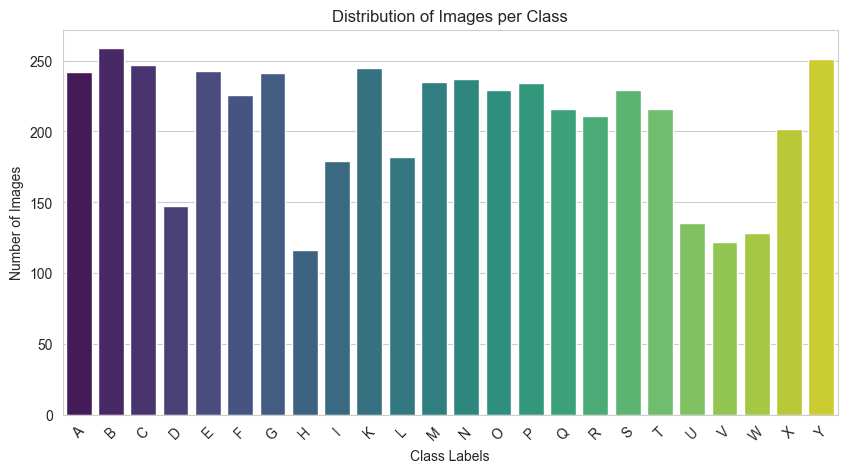

In [7]:
# Plot distribution of images per class

# Compute label counts
label_counts = pd.Series(labels).value_counts().sort_index()

# Set Seaborn style
sns.set_style("whitegrid")

# Plot bar chart with hue
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette="viridis", legend=False)

# Labels and title
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [8]:
# Encode labels
label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
print(f"Number of encoded labels: {len(labels_encoded)}")

Number of encoded labels: 4972


In [9]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [10]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
datagen.fit(X_train)

In [12]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3977, 64, 64, 3)
y_train shape: (3977, 24)
X_test shape: (995, 64, 64, 3)
y_test shape: (995, 24)


In [13]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Python3.12.4\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,465,368 (9.40 MB)

 Trainable params: 2,465,368 (9.40 MB)

 Non-trainable params: 0 (0.00 B)

c:\Python3.12.4\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


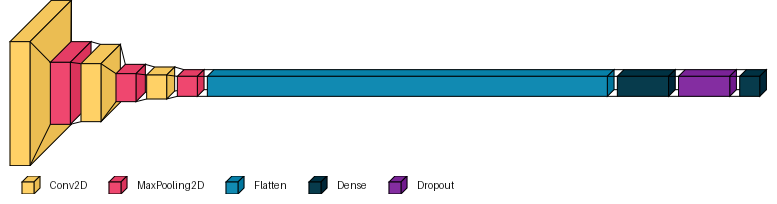

In [15]:
visualkeras.layered_view(model, scale_xy=2, legend=True)

In [16]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=20)

Epoch 1/20


c:\Python3.12.4\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.0588 - loss: 3.1039 - val_accuracy: 0.3276 - val_loss: 2.0858
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.2722 - loss: 2.2064 - val_accuracy: 0.5548 - val_loss: 1.2678
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.4469 - loss: 1.6309 - val_accuracy: 0.6362 - val_loss: 0.9626
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.5876 - loss: 1.1793 - val_accuracy: 0.7317 - val_loss: 0.7468
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.7017 - loss: 0.8855 - val_accuracy: 0.7910 - val_loss: 0.5266
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.7458 - loss: 0.7185 - val_accuracy: 0.8231 - val_loss: 0.4315
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.7728 - loss: 0.6412 - val_accuracy: 0.8824 - val_loss: 0.3201
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.7965 - loss: 0.5927 - val_accuracy: 0.89

In [17]:
# Evaluate the model
y_pred = model.predict(X_test)
y_test_labels = label_binarizer.inverse_transform(y_test)
y_pred_labels = label_binarizer.inverse_transform(y_pred)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [18]:
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           A       0.98      1.00      0.99        61
           B       1.00      1.00      1.00        48
           C       0.98      1.00      0.99        56
           D       1.00      1.00      1.00        32
           E       0.98      1.00      0.99        47
           F       1.00      0.95      0.97        41
           G       1.00      1.00      1.00        55
           H       1.00      1.00      1.00        22
           I       1.00      1.00      1.00        38
           K       0.82      1.00      0.90        45
           L       0.78      1.00      0.87        31
           M       0.72      1.00      0.84        46
           N       1.00      0.65      0.79        57
           O       1.00      1.00      1.00        41
           P       1.00      1.00      1.00        46
           Q       1.00      1.00      1.00        31
           R       1.00      0.82      0.90        57
           S       1.00    

c:\Python3.12.4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python3.12.4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python3.12.4\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


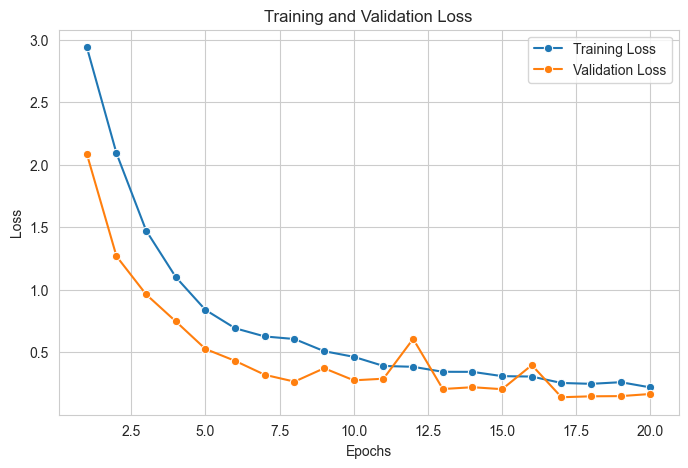

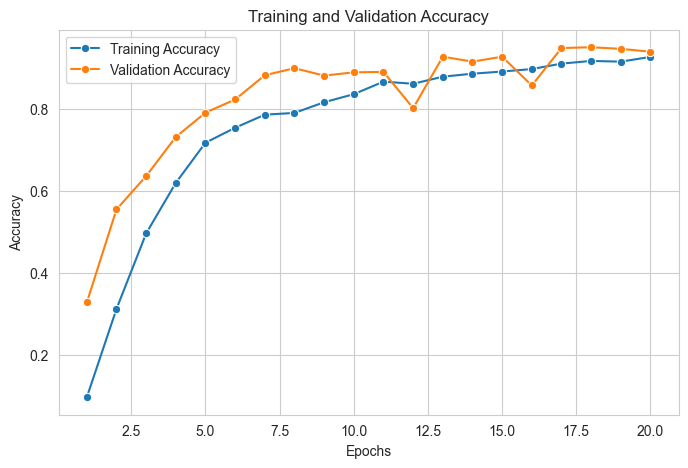

In [19]:
# Extract loss and accuracy values
epochs = list(range(1, len(history.history['loss']) + 1))

# Set Seaborn style
sns.set_style("whitegrid")

# Plot Loss Curves
plt.figure(figsize=(8, 5))
sns.lineplot(x=epochs, y=history.history['loss'], label='Training Loss', marker='o')
sns.lineplot(x=epochs, y=history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(8, 5))
sns.lineplot(x=epochs, y=history.history['accuracy'], label='Training Accuracy', marker='o')
sns.lineplot(x=epochs, y=history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

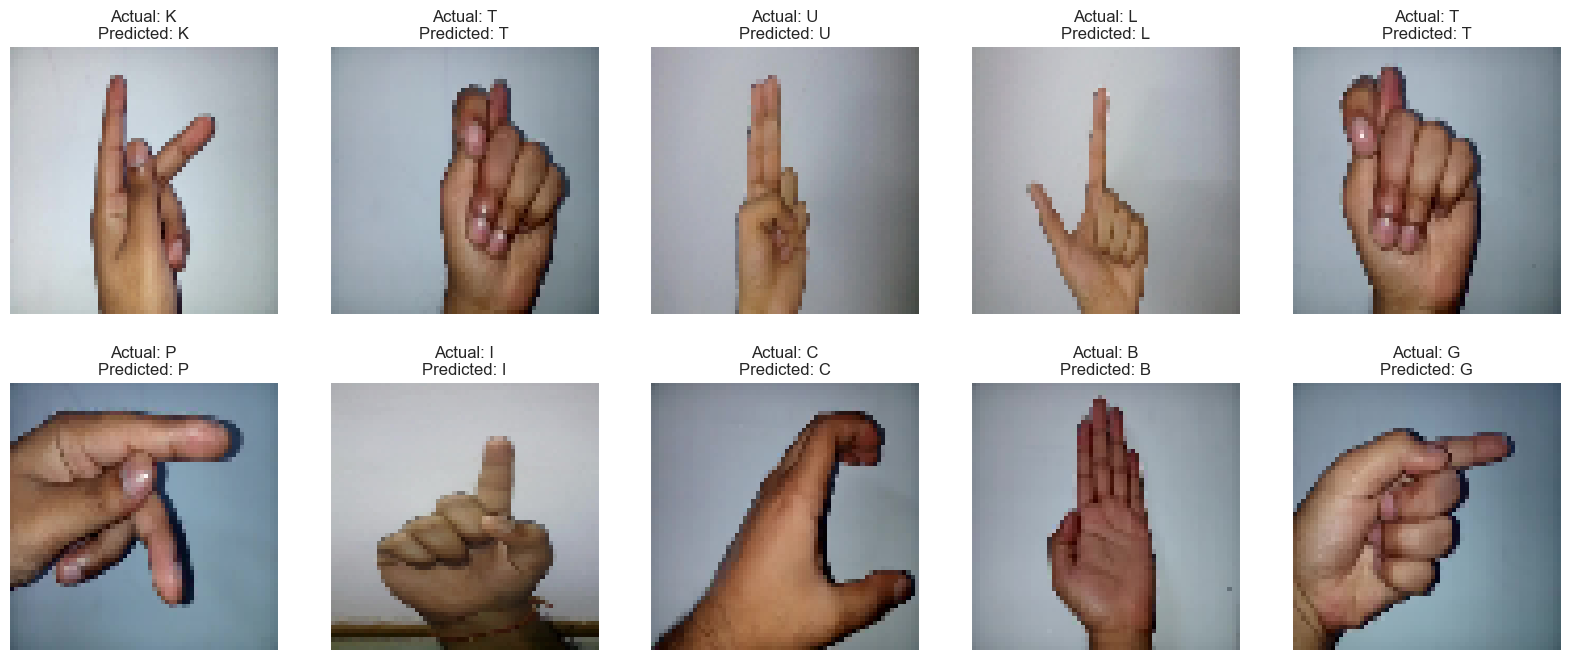

In [21]:
# Display 10 sample predictions
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    true_label = label_binarizer.inverse_transform(np.array([y_test[i]]))[0]
    pred_label = y_pred_labels[i]
    ax.set_title(f"Actual: {true_label}\nPredicted: {pred_label}")
    ax.axis('off')
plt.show()

In [22]:
model.save('my_model.keras')

In [23]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("Training Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])
print("Training Accuracy:", train_acc[-1])
print("Validation Accuracy:", val_acc[-1])

Training Loss: 0.21915706992149353
Validation Loss: 0.1668105125427246
Training Accuracy: 0.9270806908607483
Validation Accuracy: 0.9396985173225403


In [24]:
# Check for overfitting by comparing training and validation loss/accuracy
if val_loss[-1] > train_loss[-1] and val_acc[-1] < train_acc[-1]:
    print("The model might be overfitting. Consider using regularization techniques or early stopping.")
else:
    print("The model does not seem to be overfitting.")

The model does not seem to be overfitting.


In [25]:
# Check for underfitting by comparing training and validation loss/accuracy
if val_loss[-1] < train_loss[-1] and val_acc[-1] < train_acc[-1]:
    print("The model might be underfitting. Consider increasing the model complexity.")
else:
    print("The model does not seem to be underfitting.")

The model does not seem to be underfitting.
